https://www.kaggle.com/datasets/amanalisiddiqui/fraud-detection-dataset?resource=download

In [1]:
import pandas as pd

df = pd.read_csv('AIML Dataset.csv')

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

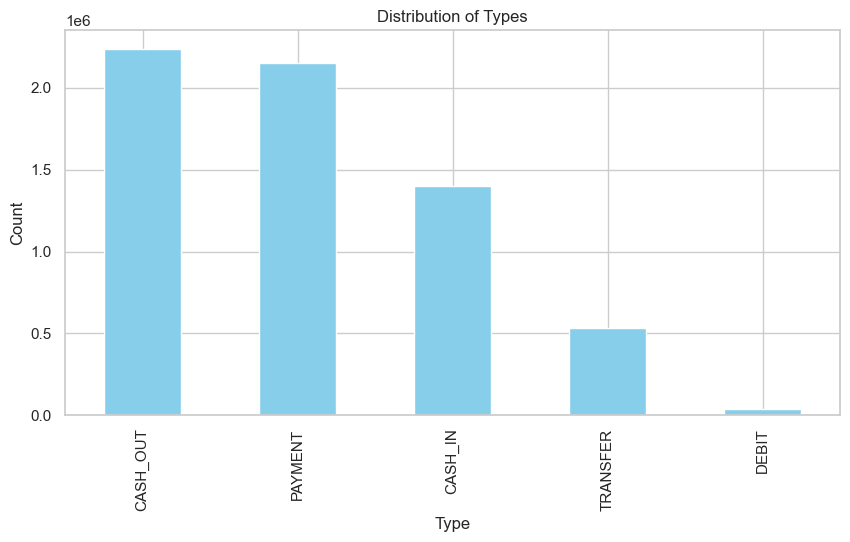

In [7]:
df['type'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

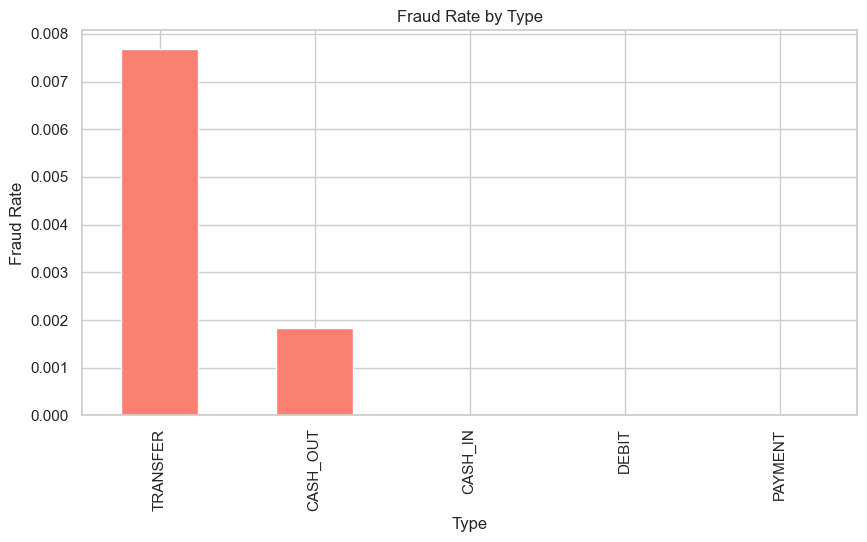

In [8]:
froud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
froud_by_type.plot(kind='bar', figsize=(10, 5), color='salmon')
plt.title('Fraud Rate by Type')
plt.xlabel('Type')
plt.ylabel('Fraud Rate')
plt.show()

In [9]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

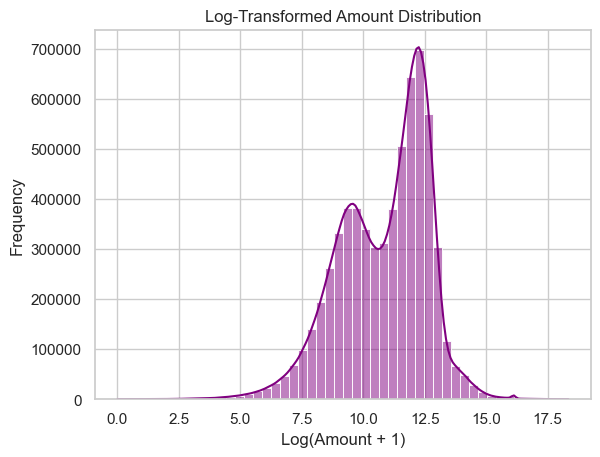

In [10]:
import numpy as np

sns.histplot(np.log1p(df['amount']), bins=50, kde=True, color='purple')
plt.title('Log-Transformed Amount Distribution')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

/var/folders/fw/fg0_f2fx5tn55v9k_2zxd6d00000gn/T/ipykernel_3113/2777737586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[df['amount'] < 50000], x='isFraud', y='amount', palette='Set2')


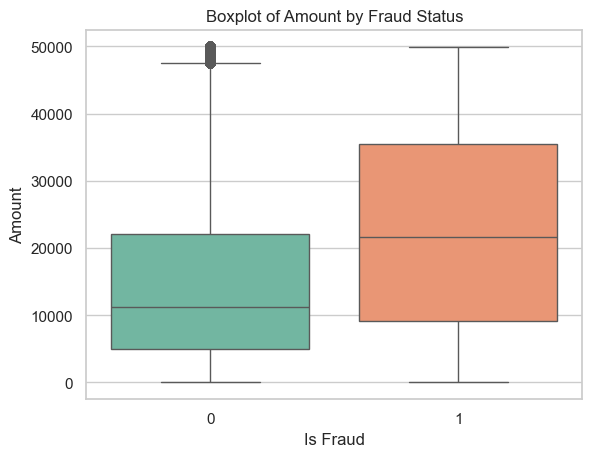

In [11]:
sns.boxplot(data = df[df['amount'] < 50000], x='isFraud', y='amount', palette='Set2')
plt.title('Boxplot of Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

In [12]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


In [13]:
(df['balanceDiffOrig'] < 0).sum(), (df['balanceDiffDest'] < 0).sum()

(np.int64(1399253), np.int64(1238864))

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


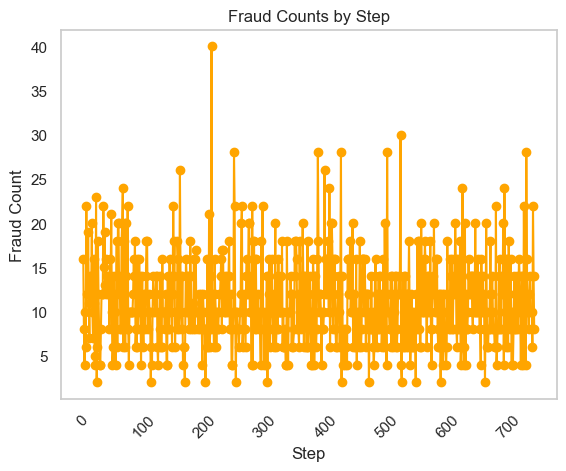

In [15]:
frouds_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(frouds_per_step.index, frouds_per_step.values, marker='o', linestyle='-', color='orange')
plt.title('Fraud Counts by Step')
plt.xlabel('Step')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [16]:
df.drop(columns=['step'], inplace=True)

In [17]:
top_senders = df['nameOrig'].value_counts().head(10)

In [18]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [19]:
top_receivers = df['nameDest'].value_counts().head(10)

In [20]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [21]:
froud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
froud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [22]:
fraud_types = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]

In [23]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

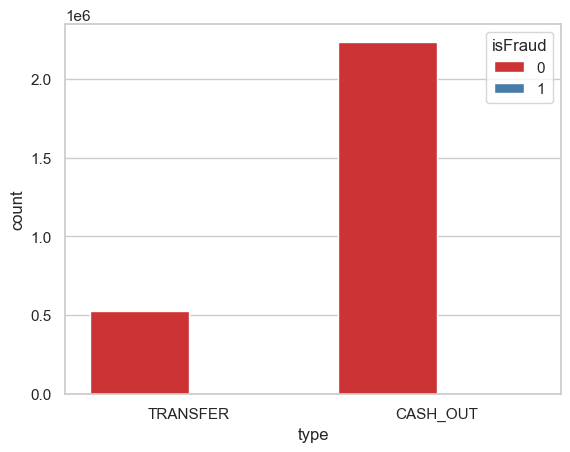

In [24]:
sns.countplot(data=fraud_types, x='type', hue='isFraud', palette='Set1')

In [25]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [26]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

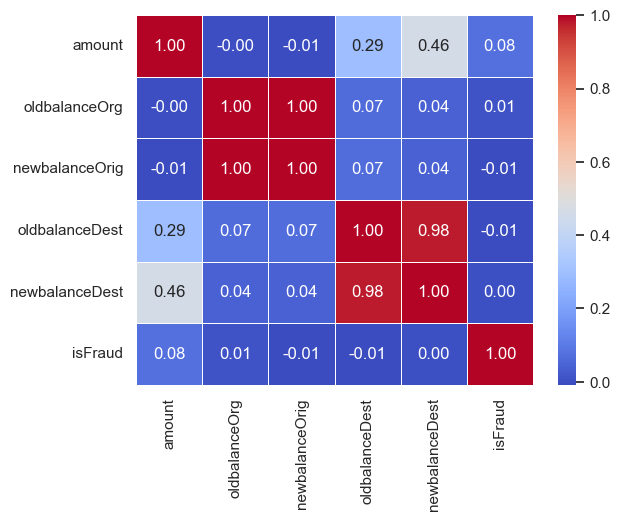

In [27]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [32]:
zero_after_transfer = df[(df['type'].isin(['TRANSFER', 'CASH_OUT'])) & (df['newbalanceOrig'] == 0) & (df['oldbalanceOrg'] > 0)]

In [33]:
len(zero_after_transfer)

1188074

In [34]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [35]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   type             object 
 1   amount           float64
 2   oldbalanceOrg    float64
 3   newbalanceOrig   float64
 4   oldbalanceDest   float64
 5   newbalanceDest   float64
 6   isFraud          int64  
 7   balanceDiffOrig  float64
 8   balanceDiffDest  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 436.9+ MB


In [46]:
X, y = df.drop(columns=['isFraud']), df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceDiffOrig', 'balanceDiffDest']),
        ('cat', OneHotEncoder(drop='first'), ['type'])
    ]
)

In [50]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [52]:
pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.87      0.44      0.58      1643

    accuracy                           1.00   1272524
   macro avg       0.93      0.72      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [57]:
confusion_mtx = confusion_matrix(y_test, pipeline.predict(X_test))
confusion_mtx

array([[1270772,     109],
       [    922,     721]])

In [58]:
pipeline.score(X_test, y_test)

0.9991897991707819

In [59]:
import joblib

joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']